# The Sparks Foundation GRIP internship April 2023
## task2:Exploratory Data Analysis dataset ‘SampleSuperstore’.
## name =swaraj solanke

# importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn 
import os

# reading the dataset

In [3]:
df=pd.read_csv("SampleSuperstore.csv")

In [4]:
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [5]:
df.dtypes

Ship Mode        object
Segment          object
Country          object
City             object
State            object
Postal Code       int64
Region           object
Category         object
Sub-Category     object
Sales           float64
Quantity          int64
Discount        float64
Profit          float64
dtype: object

In [6]:
#showed numbers rows and columns in the dataset
df.shape

(9994, 13)

In [7]:
# checking for duplicates 
df.duplicated().sum()

17

In [8]:
#droping the duplicates 
df.drop_duplicates()
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [9]:
# removing the unnecessary columns such as postal code 
df=df.drop(["Postal Code"],axis=1)

In [10]:
#  after removing the postal code column
df.head()

,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [11]:
#check whether dataset contain null value or not
df.isnull()

,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
9989,False,False,False,False,False,False,False,False,False,False,False,False
9990,False,False,False,False,False,False,False,False,False,False,False,False
9991,False,False,False,False,False,False,False,False,False,False,False,False
9992,False,False,False,False,False,False,False,False,False,False,False,False


# Explorative data Analysis 

## Data visualization

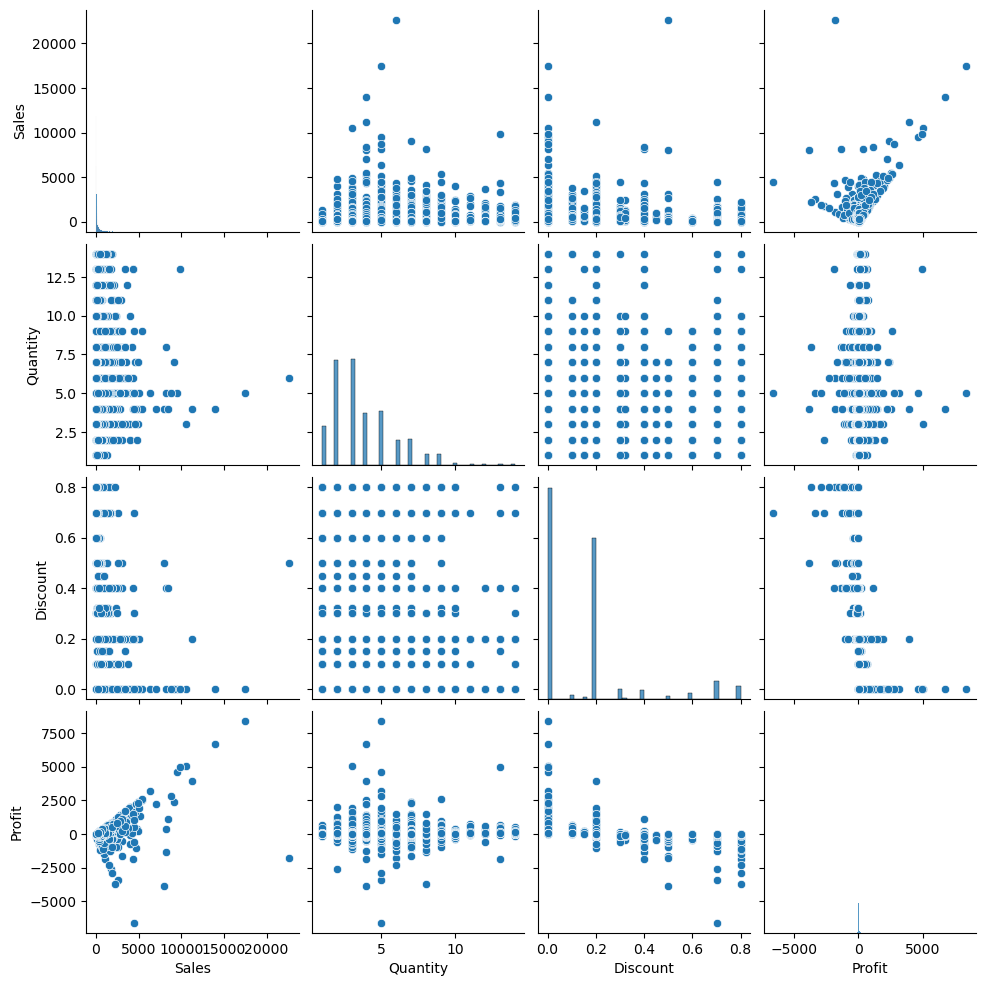

In [12]:
# visualizing the dataset as whole pair plot 
sn.pairplot(df)

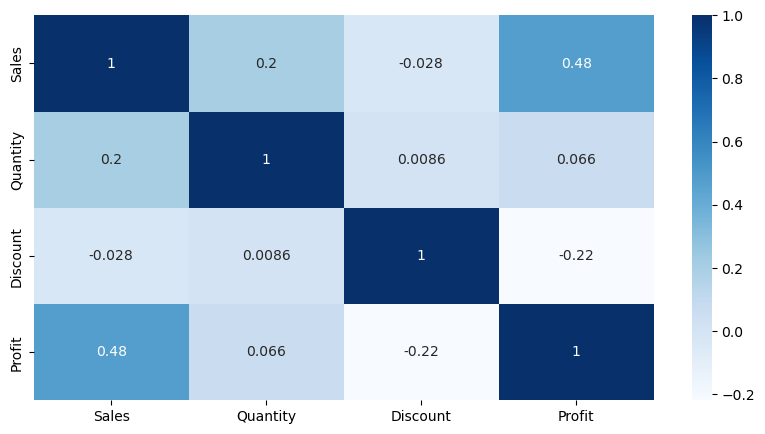

In [13]:
#finding the pairwise correlation between the columns and visualize using heatmaps 
df.corr()
plt.figure(figsize=(10,5))
sn.heatmap(df.corr(),annot=True ,cmap="Blues")
plt.show()

# visualizing the ship mode

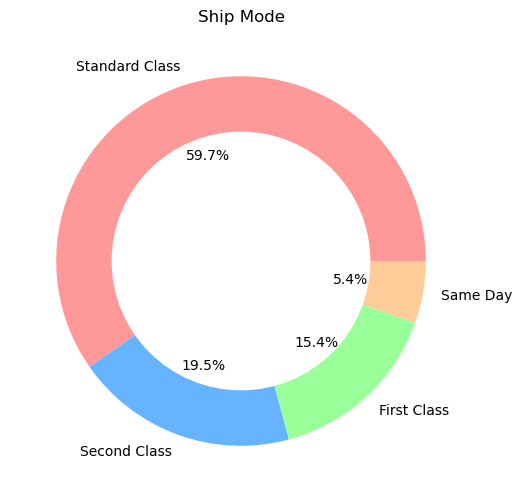

In [14]:
# visualizing ship modes 
colors=['#ff9999','#66b3ff','#99ff99','#ffcc99']
plt.figure(figsize=(6,6))
plt.title("Ship Mode")
plt.pie(df["Ship Mode"].value_counts(),labels=df["Ship Mode"].value_counts().index,autopct="%1.1f%%",colors=colors)
centre_Circle=plt.Circle((0,0),0.70,fc="White")
fig=plt.gcf()
fig.gca().add_artist(centre_Circle)
plt.show()

# visualizing the categories

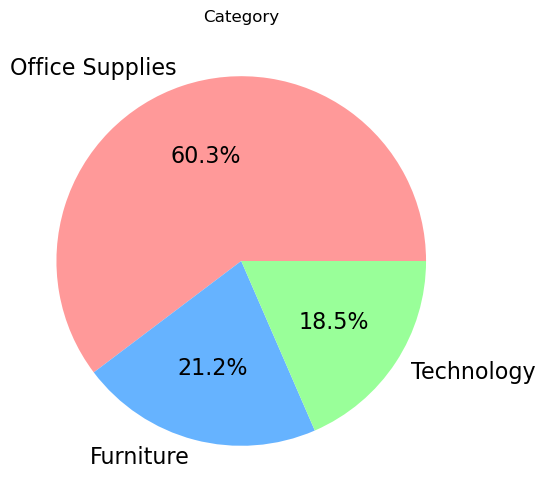

In [15]:
# visualizing the categories
plt.figure(figsize=(6,6))
textprops={"fontsize":16}
plt.title('Category')
plt.pie(df['Category'].value_counts(),labels=df['Category'].value_counts().index,autopct='%1.1f%%',textprops=textprops,
       colors=colors)
plt.show()

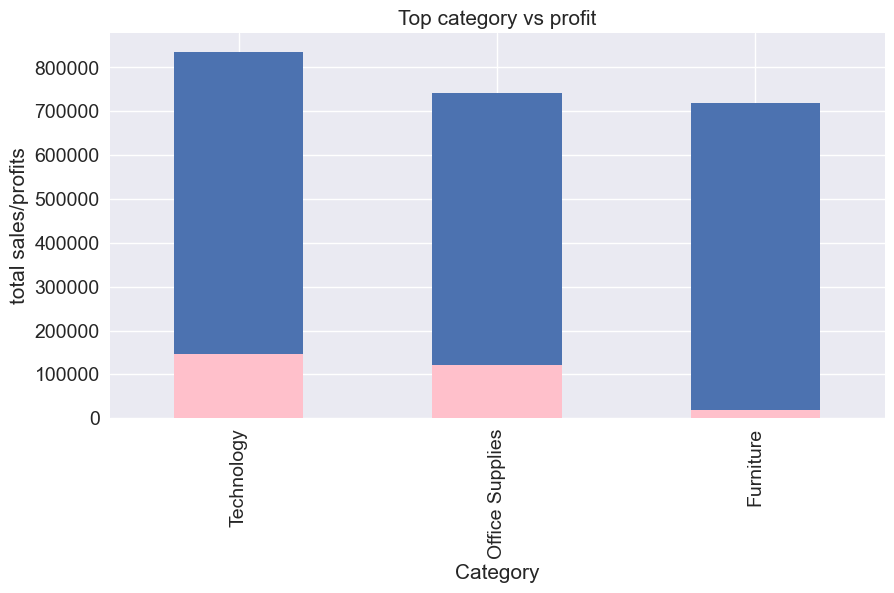

In [16]:
# computing top categories in terms of sales from 100 observations
top_category_s=df.groupby('Category').Sales.sum().nlargest(n=100)
#computing top categories in terms of profit first 100 obersvation
top_category_p=df.groupby('Category').Profit.sum().nlargest(n=100)

#ploting to see its visualization
plt.style.use('seaborn')
top_category_s.plot(kind='bar',figsize=(10,5),fontsize=14)
top_category_p.plot(kind='bar',figsize=(10,5),fontsize=14,color="pink")
plt.xlabel('Category',fontsize=15)
plt.ylabel("total sales/profits",fontsize=15)
plt.title("Top category vs profit",fontsize=15)
plt.show()

## the graph clearly dipcts that technoogy and offices supplies have most sales and profit

# visualizing the sales vs profit in different sub -categories


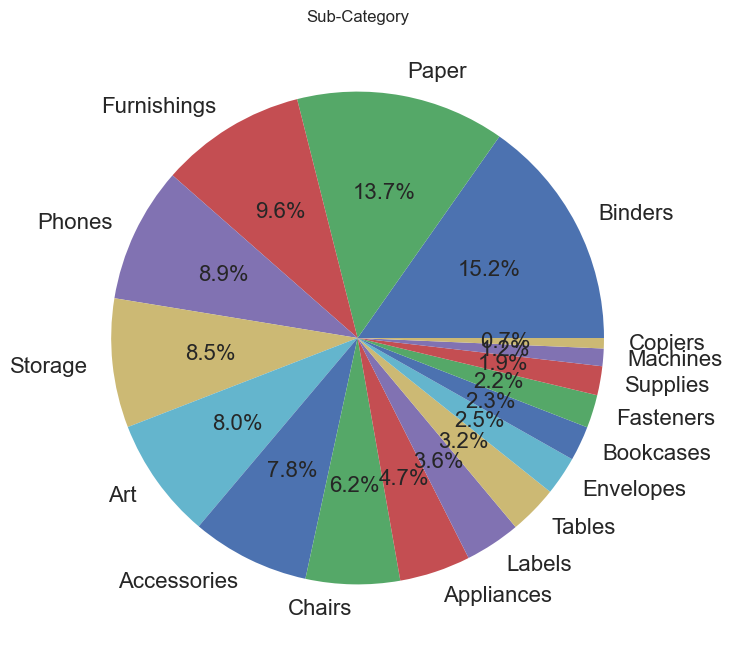

In [17]:
plt.figure(figsize=(8,8))
textprops={"fontsize":16}
plt.title('Sub-Category')
plt.pie(df['Sub-Category'].value_counts(),labels=df['Sub-Category'].value_counts().index,
        autopct='%1.1f%%',textprops=textprops)
plt.show()

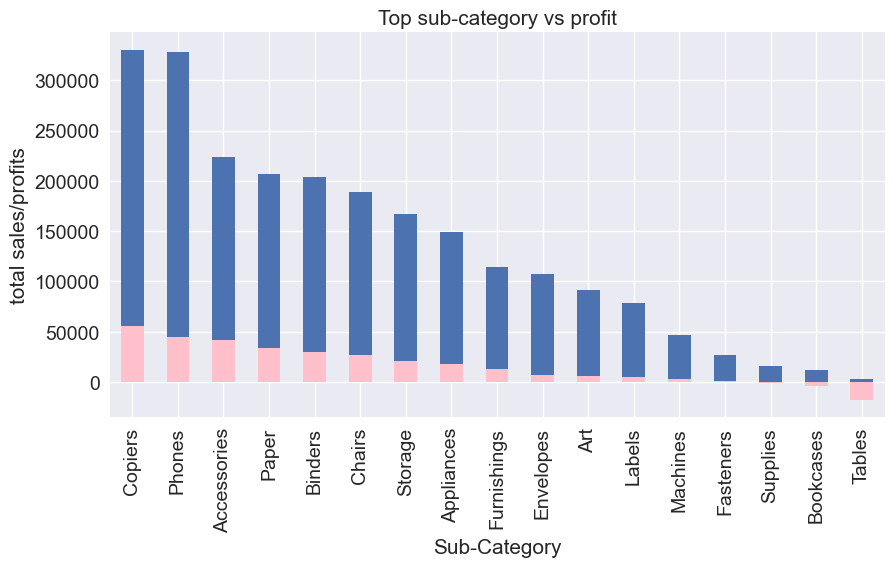

In [32]:
# computing top sub-categories in terms of sales from 100 observations
top_category_s=df.groupby('Sub-Category').Sales.sum().nlargest(n=100)
#computing top sub-categories in terms of profit first 100 obersvation
top_category_p=df.groupby('Sub-Category').Profit.sum().nlargest(n=100)

#ploting to see its visualization
plt.style.use('seaborn')
top_category_s.plot(kind='bar',figsize=(10,5),fontsize=14)
top_category_p.plot(kind='bar',figsize=(10,5),fontsize=14,color="pink")
plt.xlabel('Sub-Category',fontsize=15)
plt.ylabel("total sales/profits",fontsize=15)
plt.title("Top sub-category vs profit",fontsize=15)
plt.show()

In [26]:
# more details view 
plt.figure(figsize=(14,12))
statewise=df.groupby(['Sub-Category'])['Profit'].sum().nlargest(50)
statewise.plot.barh()#h for horizontal


<AxesSubplot:ylabel='Sub-Category'>

In [ ]:
the above shows that copiers and phones have the highest sales and profits and tables has negative profit

# visualizing the sales vs profits in different regions

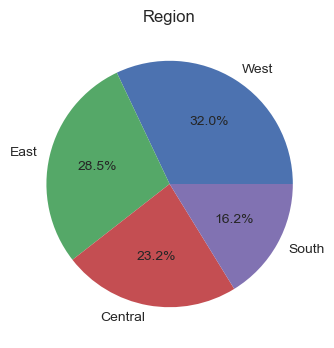

In [30]:

plt.figure(figsize=(4,4))
plt.title('Region')
plt.pie(df['Region'].value_counts(),labels=df['Region'].value_counts().index,
        autopct='%1.1f%%')
plt.show()

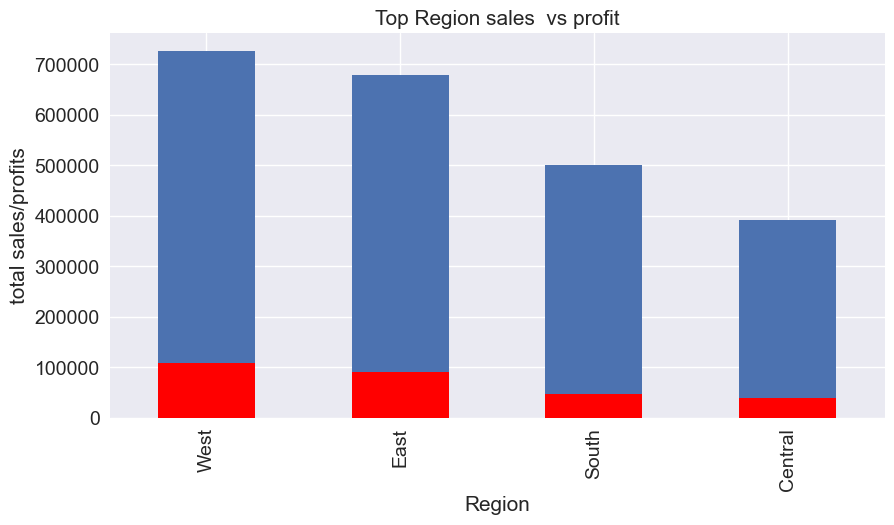

In [33]:
# computing top regions in terms of sales from 100 observations
top_category_s=df.groupby('Region').Sales.sum().nlargest(n=100)
#computing top regions in terms of profit first 100 obersvation
top_category_p=df.groupby('Region').Profit.sum().nlargest(n=100)

#ploting to see its visualization
plt.style.use('seaborn')
top_category_s.plot(kind='bar',figsize=(10,5),fontsize=14)
top_category_p.plot(kind='bar',figsize=(10,5),fontsize=14,color="red")
plt.xlabel('Region',fontsize=15)
plt.ylabel("total sales/profits",fontsize=15)
plt.title("Top Region sales  vs profit",fontsize=15)
plt.show()

## the graph shows that west and east have same profit through sales in east are less as compared to west

# visualizing the sales vs profit in different states


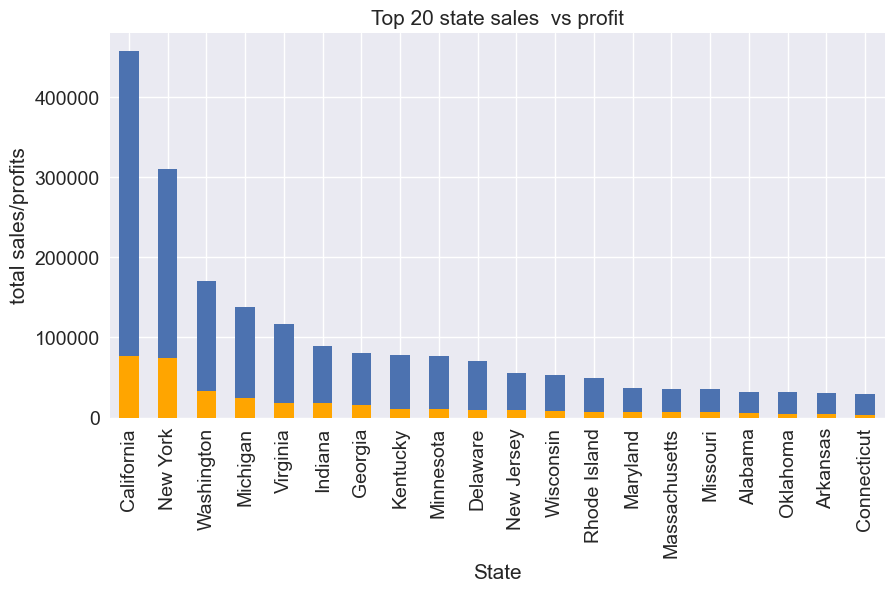

In [36]:
# computing top sates in terms of sales from 100 observations
top_category_s=df.groupby('State').Sales.sum().nlargest(n=20)
#computing top states in terms of profit first 100 obersvation
top_category_p=df.groupby('State').Profit.sum().nlargest(n=20)

#ploting to see its visualization
plt.style.use('seaborn')
top_category_s.plot(kind='bar',figsize=(10,5),fontsize=14)
top_category_p.plot(kind='bar',figsize=(10,5),fontsize=14,color="orange")
plt.xlabel('State',fontsize=15)
plt.ylabel("total sales/profits",fontsize=15)
plt.title("Top 20 state sales  vs profit",fontsize=15)
plt.show()

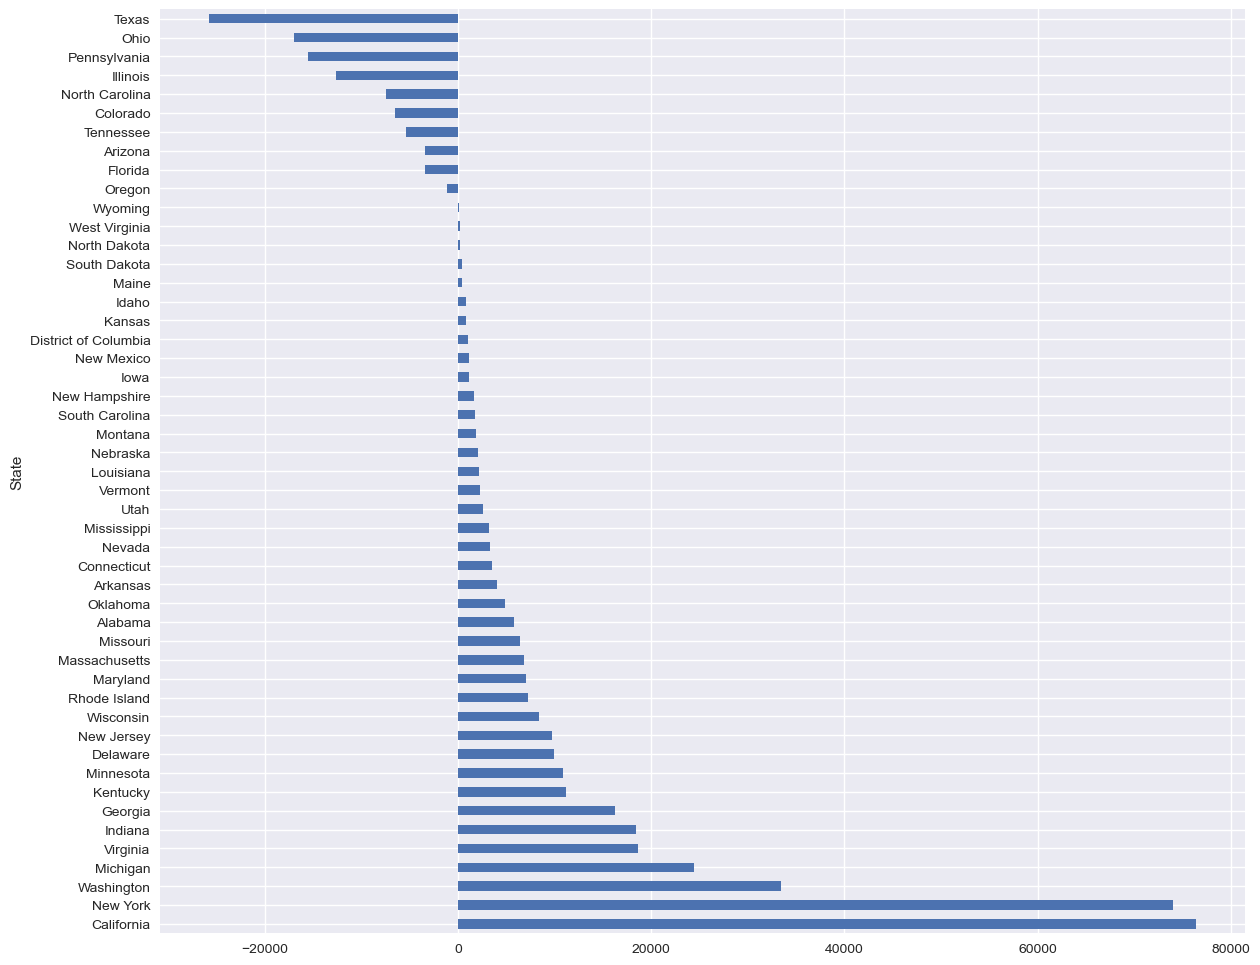

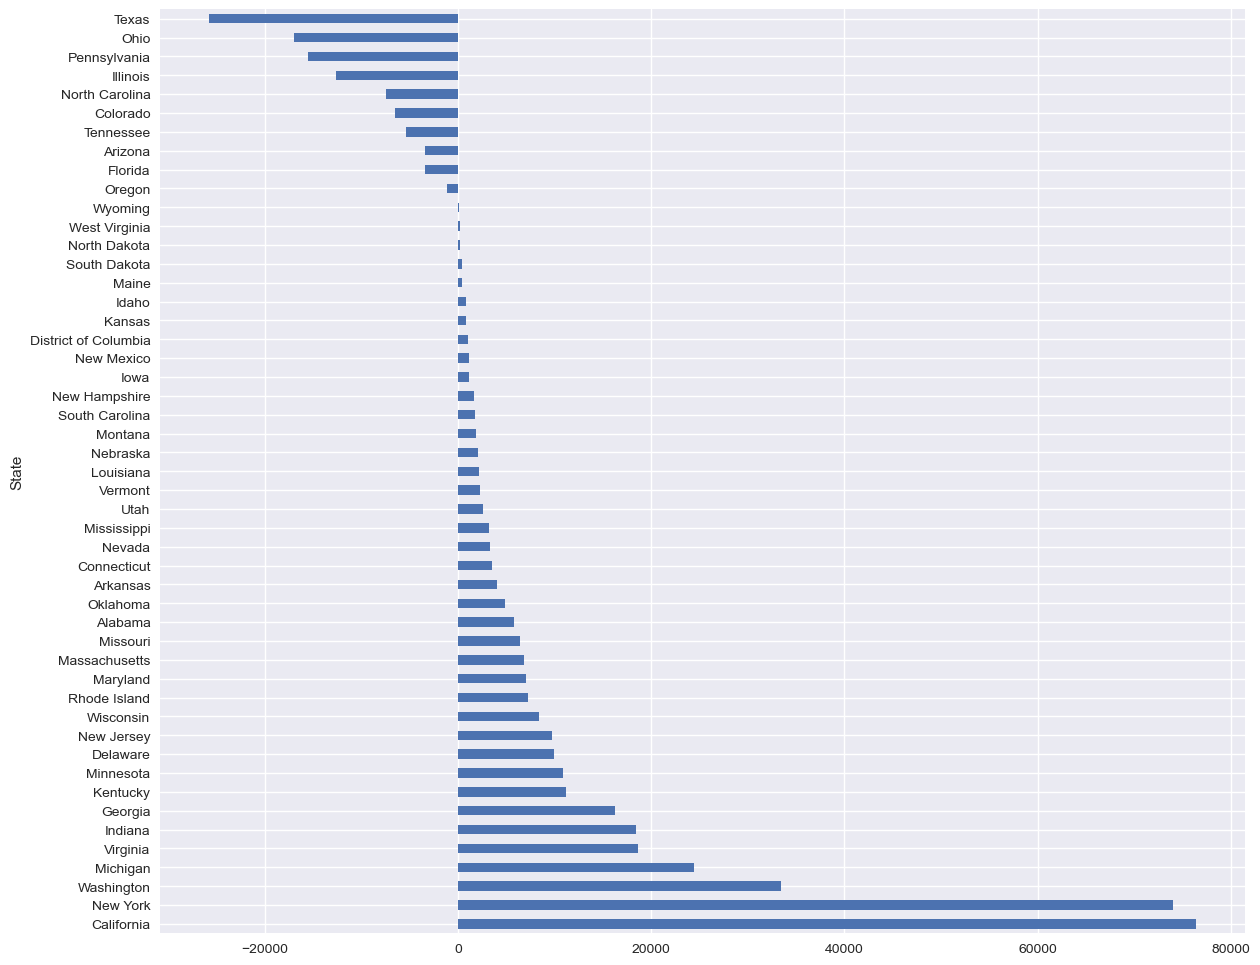

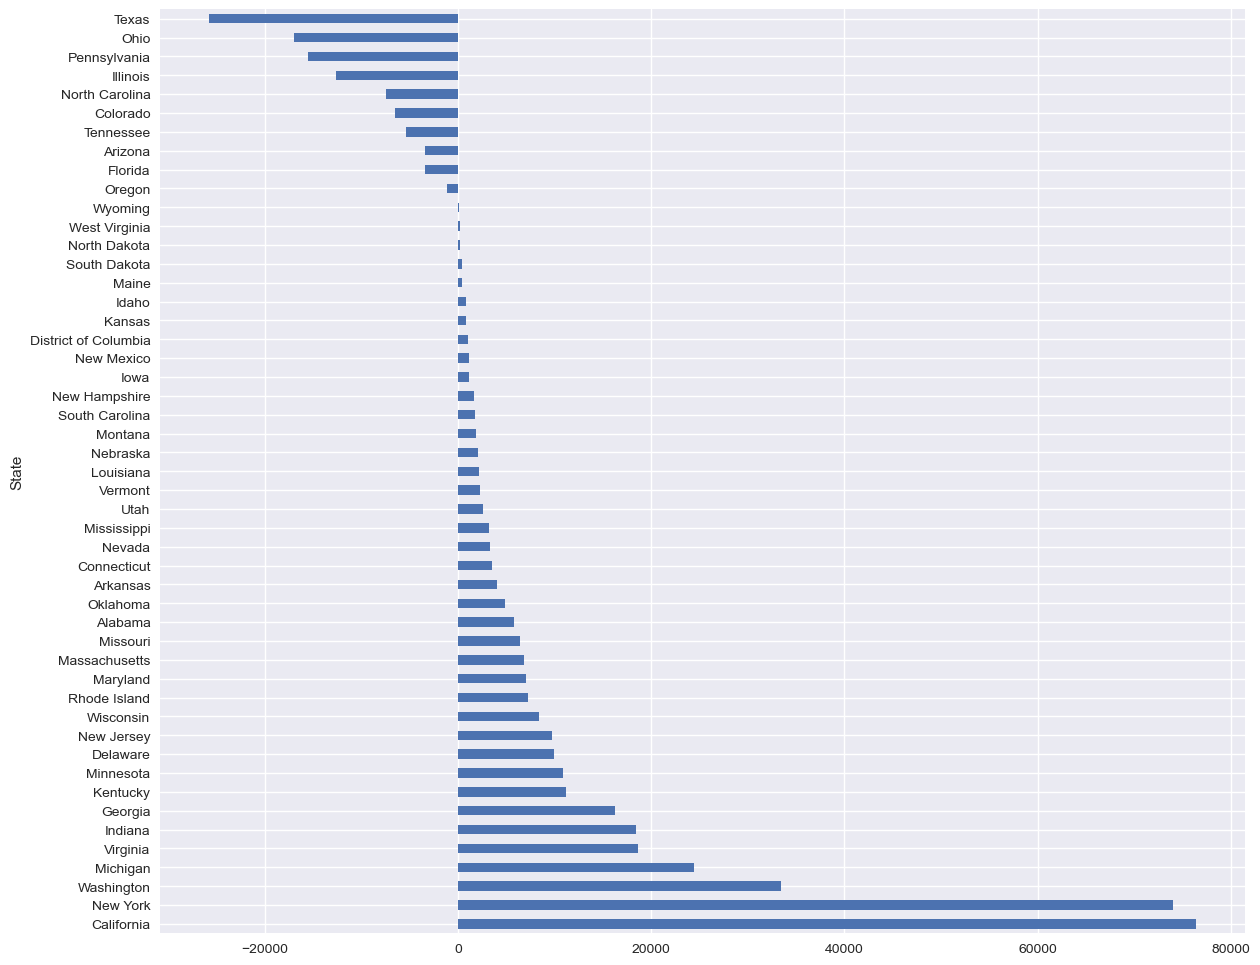

In [39]:
# more details view 
plt.figure(figsize=(14,12))
statewise=df.groupby(['State'])['Profit'].sum().nlargest(50)
statewise.plot.barh()#h for horizontal
plt.show()


## the given graph shows that the california and newwork  have the highest sales and profit

# checking the interdependency of sales ,profits and discounts.

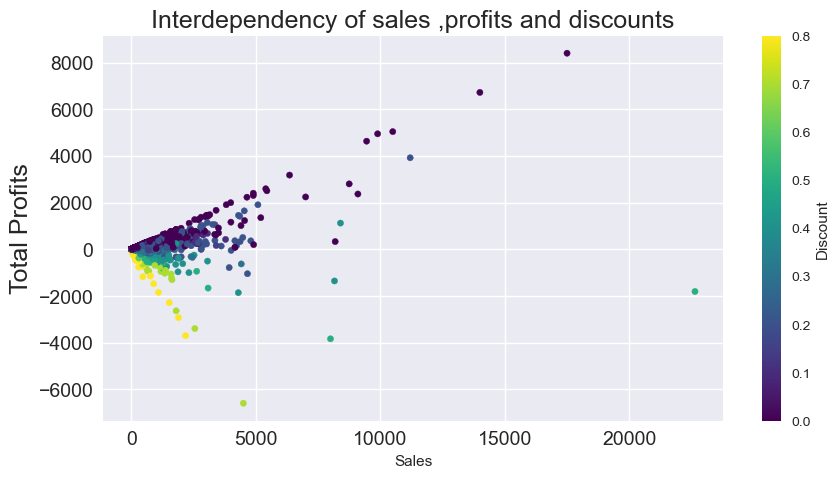

In [41]:
plt.style.use('seaborn')
df.plot(kind="scatter",figsize=(10,5),x="Sales",y="Profit",c="Discount",s=20,fontsize=14,
       colormap="viridis")
plt.ylabel("Total Profits",fontsize=18)
plt.title("Interdependency of sales ,profits and discounts",fontsize=18)
plt.show()

## the graph clearly shows that if we give dicounts sales incerases but profit decreases

# conclusion:
## the weak area where one can work and make a more profit.

## 1)we should limits sales of furniture and incearse that the technology as furniture has very less profit as compared to sales

## 2)considering the sub-categories of sales of tables should be minimized.

## 3)incearse sales more in east as profit is more.

## 4)we should concentrate on the new-york and california to make more profit 